https://www.kaggle.com/nsrose7224/crowdedness-at-the-campus-gym/downloads/data.csv/2

## Goals  REGRESSION task
* Given a time of day (and maybe some other features, including weather), predict how crowded the gym will be.
* Figure out which features are actually important, which are redundant.
* I manually added noise and extra "fake" features

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('data/data.csv') #Replace it with your path where the data file is stored

    # CHANGE THE DATA FOR YOUR CHALLENGE

In [3]:
import random
my_randoms = np.array([random.randint(0,100) for i in range(62184)])
my_randoms = my_randoms /1000

In [4]:
df["fakeFeature1"] = df["month"] * df["hour"]
df["fakeFeature2"] = df["is_weekend"] + df["is_holiday"]
df["fakeFeature3"] = df["is_weekend"] - df["is_holiday"]
df["fakeFeature4"] = df["temperature"] * df["month"]
df["fakeFeature5"] = df["hour"] * df["hour"]
df["fakeFeature6"] = df["temperature"] * my_randoms
df["fakeFeature7"] = df["hour"] * my_randoms * 0.1
df["fakeFeature8"] = df["temperature"] * df["month"] * my_randoms

In [5]:
df.drop("date", axis = 1, inplace = True)

### This is the base model we want to improve

In [6]:
y = df["number_people"]  # all rows, label only
X = df.drop("number_people", axis = 1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y)
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [7]:
from sklearn.metrics import r2_score
print (" train "  , model.score(x_train,y_train))
print ("test "  , r2_score(model.predict(x_test),y_test))

 train  0.9859380442034742
test  0.8886439883160174


# YOUR TURN

## create the X and y

* select df["number_people"] for y and all the other columns for X (using df.drop("number_people", axis = 1))

In [8]:
y = df["number_people"]  # all rows, label only
X = df.drop("number_people", axis = 1)

## Feature Scaling X

* use from sklearn.preprocessing import StandardScaler
* create the scaler object
* fit_transform (X) and store the result back to X  so that X is scaled

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
X=scaler.fit_transform(X)

## PCA


* from sklearn.decomposition import PCA
* create an object called pca using PCA(n_components=10) or (0.80)
* fit_transform(X) and store the result to a variable called X_pca

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA(0.80)

In [14]:
X_pca = pca.fit_transform(X)

## Split the data 

* use from sklearn.model_selection import train_test_split to split the data into training and testing
* remember to pass the x_pca not the original X

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_pca, y)

* from sklearn.ensemble import RandomForestRegressor

In [16]:
from sklearn.ensemble import RandomForestRegressor

* create model

In [17]:
model = RandomForestRegressor()

* fit the model fit(x_train, y_train)

In [18]:
model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

* print the score for training and  r2_score(model.predict(x_test),y_test)) for testing

In [19]:
print (" train "  , model.score(x_train,y_train))
print ("test "  , r2_score(model.predict(x_test),y_test))

 train  0.9658367875292062
test  0.6725628591394004


* what is the effect of the PCA?

    somehow it made the model less prunes to overfitting the training data 

# try to improve the model

### Correlation between different fearures

* create the correlation matrix using df.corr()
* add also the .abs() function so that minus and plus will be seen as the same

In [20]:
# find correlations to target
correlation = df.corr().abs()

* create an heatmap using sns.heatmap with the correlation you created above , add ( annot= true) so you can see the value
* add this line if you cannot see well the graph plt.figure(figsize=(20,10))

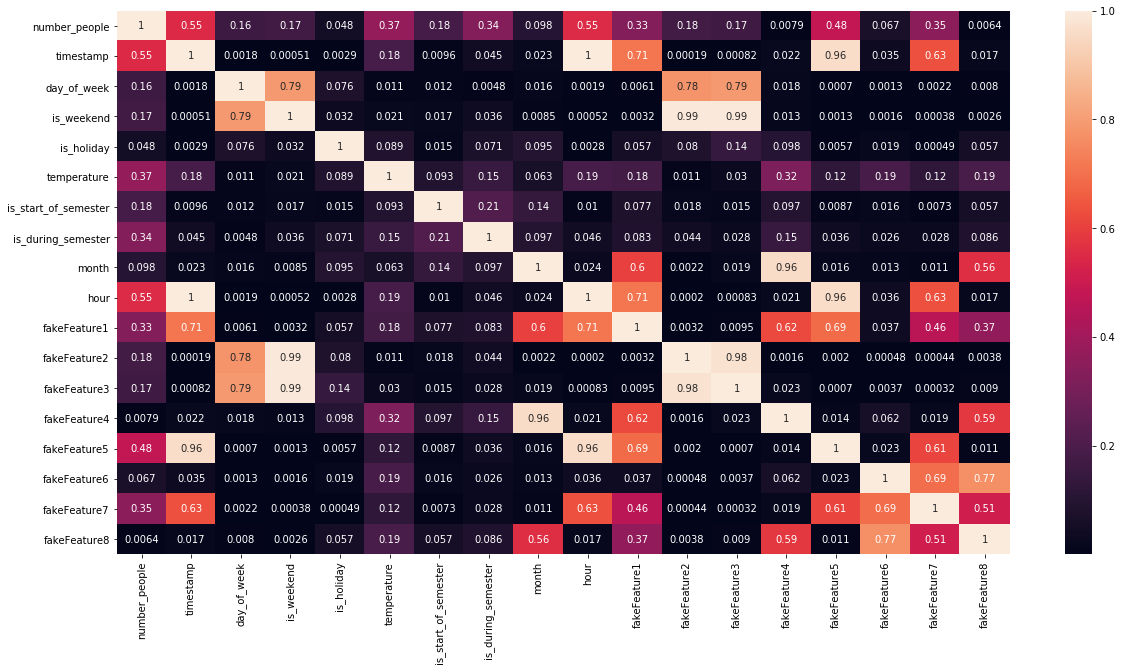

In [21]:
plt.figure(figsize=(20,10))
sns.heatmap(correlation,annot=True)

## correlation to the target

* use this code to print the features correlated to the target

    *    print(correlation['number_people'].sort_values(ascending=False).head(10))

In [22]:
print(correlation['number_people'].sort_values(ascending=False).head(10))

number_people           1.000000
hour                    0.552049
timestamp               0.550218
fakeFeature5            0.478091
temperature             0.373327
fakeFeature7            0.348691
is_during_semester      0.335350
fakeFeature1            0.333939
is_start_of_semester    0.182683
fakeFeature2            0.178896
Name: number_people, dtype: float64


##  features selection

use the information above and..

* decide what features to keep
* create a new dataset by droping the column that you don't want
* to drop a column :
    * df.drop("column name", axis = 1)
* create again your X and y from this new dataset
* normalised the data
* decide if you want to do PCA
* split the data
* build the model - RandomForestRegressor
* print the scores

In [23]:
df.drop("fakeFeature1", axis = 1, inplace = True)
df.drop("fakeFeature2", axis = 1, inplace = True)
df.drop("fakeFeature3", axis = 1, inplace = True)
df.drop("fakeFeature4", axis = 1, inplace = True)
#df.drop("fakeFeature5", axis = 1, inplace = True)
df.drop("fakeFeature6", axis = 1, inplace = True)
df.drop("fakeFeature7", axis = 1, inplace = True)
df.drop("fakeFeature8", axis = 1, inplace = True)

In [24]:
# this code can be useful when you have a long list of features and it is hard to look at the graph

"""
s = correlation.unstack()
so = pd.DataFrame(s.sort_values(kind="quicksort"), columns = ["corr"])
so.sort_values(["corr"], ascending=False)
"""

'\ns = correlation.unstack()\nso = pd.DataFrame(s.sort_values(kind="quicksort"), columns = ["corr"])\nso.sort_values(["corr"], ascending=False)\n'

In [25]:
y = df["number_people"]  # all rows, label only
X = df.drop("number_people", axis = 1)

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X=scaler.fit_transform(X)

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y)

In [28]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [29]:
from sklearn.metrics import r2_score
print (" train "  , model.score(x_train,y_train))
print ("test "  , r2_score(model.predict(x_test),y_test))

 train  0.9876415777013526
test  0.9053073059413778


## with PCA

In [30]:
y = df["number_people"]  # all rows, label only
X = df.drop("number_people", axis = 1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)

In [31]:
from sklearn.decomposition import PCA

pca = PCA(0.90)
X_pca = pca.fit_transform(X)

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y)

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)

from sklearn.metrics import r2_score
print (" train "  , model.score(x_train,y_train))
print ("test "  , r2_score(model.predict(x_test),y_test))

 train  0.9880093637167823
test  0.9051238557401062
